In [1]:
#Import neccessary libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import random
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay







## Reading the data

In [3]:
df = pd.read_csv("Deepression.csv")

df.head()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1,1,1,5,5,1,5,5,1,5,5,5,5,5,Mild
1,2,2,5,5,1,1,5,1,1,5,1,1,1,1,1,Moderate
2,3,5,2,2,2,2,2,2,2,2,2,2,2,2,2,Severe
3,4,1,1,1,5,5,1,5,5,1,5,5,5,5,5,No depression
4,5,2,5,5,1,1,5,1,1,5,1,1,1,1,1,Moderate



## Feature Descriptions

- **Number**: Unique identifier for each patient.
- **Sleep**: Frequency of sleep disturbances. 
  - *Values*: 
    - 1: Never
    - 2: Always
    - 3: Often
    - 4: Rarely
    - 5: Sometimes
    - 6: Not at all
- **Appetite**: Changes in appetite. 
  - *Values*: 
    - 1: Never
    - 2: Always
    - 3: Often
    - 4: Rarely
    - 5: Sometimes
    - 6: Not at all
- **Interest**: Loss of interest in activities. 
  - *Values*: 
    - 1: Never
    - 2: Always
    - 3: Often
    - 4: Rarely
    - 5: Sometimes
    - 6: Not at all
- **Fatigue**: Feelings of fatigue or low energy. 
  - *Values*: 
    - 1: Never
    - 2: Always
    - 3: Often
    - 4: Rarely
    - 5: Sometimes
    - 6: Not at all
- **Worthlessness**: Feelings of worthlessness or excessive guilt. 
  - *Values*: 
    - 1: Never
    - 2: Always
    - 3: Often
    - 4: Rarely
    - 5: Sometimes
    - 6: Not at all
- **Concentration**: Difficulty concentrating. 
  - *Values*: 
    - 1: Never
    - 2: Always
    - 3: Often
    - 4: Rarely
    - 5: Sometimes
    - 6: Not at all
- **Agitation**: Physical agitation. 
  - *Values*: 
    - 1: Never
    - 2: Always
    - 3: Often
    - 4: Rarely
    - 5: Sometimes
    - 6: Not at all
- **Suicidal Ideation**: Thoughts of self-harm or suicide. 
  - *Values*: 
    - 1: Never
    - 2: Always
    - 3: Often
    - 4: Rarely
    - 5: Sometimes
    - 6: Not at all
- **Sleep Disturbance**: Issues with sleeping. 
  - *Values*: 
    - 1: Never
    - 2: Always
    - 3: Often
    - 4: Rarely
    - 5: Sometimes
    - 6: Not at all
- **Aggression**: Feelings of aggression. 
  - *Values*: 
    - 1: Never
    - 2: Always
    - 3: Often
    - 4: Rarely
    - 5: Sometimes
    - 6: Not at all
- **Panic Attacks**: Experiencing panic attacks. 
  - *Values*: 
    - 1: Never
    - 2: Always
    - 3: Often
    - 4: Rarely
    - 5: Sometimes
    - 6: Not at all
- **Hopelessness**: Feelings of hopelessness. 
  - *Values*: 
    - 1: Never
    - 2: Always
    - 3: Often
    - 4: Rarely
    - 5: Sometimes
    - 6: Not at all
- **Restlessness**: Feelings of restlessness. 
  - *Values*: 
    - 1: Never
    - 2: Always
    - 3: Often
    - 4: Rarely
    - 5: Sometimes
    - 6: Not at all
- **Low Energy**: Lack of energy. 
  - *Values*: 
    - 1: Never
    - 2: Always
    - 3: Often
    - 4: Rarely
    - 5: Sometimes
    - 6: Not at all
- **Depression State**: Overall depression state, categorized into one of the following:
  - *Categories*:
    - No depression
    - Mild
    - Moderate
    - Severe


In [5]:
# 

df2 = df.copy()

df2.head()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1,1,1,5,5,1,5,5,1,5,5,5,5,5,Mild
1,2,2,5,5,1,1,5,1,1,5,1,1,1,1,1,Moderate
2,3,5,2,2,2,2,2,2,2,2,2,2,2,2,2,Severe
3,4,1,1,1,5,5,1,5,5,1,5,5,5,5,5,No depression
4,5,2,5,5,1,1,5,1,1,5,1,1,1,1,1,Moderate


## Data Cleaning and Preprocessing

In [ ]:
# Droping the Number column as it does not contain any useful data
df2.drop(columns=['Number '] , inplace= True)

In [66]:
df2

,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1,1,5,5,1,5,5,1,5,5,5,5,5,Mild
1,2,5,5,1,1,5,1,1,5,1,1,1,1,1,Moderate
2,5,2,2,2,2,2,2,2,2,2,2,2,2,2,Severe
3,1,1,1,5,5,1,5,5,1,5,5,5,5,5,No depression
4,2,5,5,1,1,5,1,1,5,1,1,1,1,1,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,2,5,5,1,1,5,1,1,5,1,1,1,1,5,Mild
536,5,2,2,2,2,2,2,2,2,2,2,2,2,1,Severe
537,1,1,1,5,5,1,5,5,1,5,5,5,5,2,No depression
538,2,5,5,1,1,5,1,1,5,1,1,1,1,1,Severe


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sleep              540 non-null    int64 
 1   Appetite           540 non-null    int64 
 2   Interest           540 non-null    int64 
 3   Fatigue            540 non-null    int64 
 4   Worthlessness      540 non-null    int64 
 5   Concentration      540 non-null    int64 
 6   Agitation          540 non-null    int64 
 7   Suicidal Ideation  540 non-null    int64 
 8   Sleep Disturbance  540 non-null    int64 
 9   Aggression         540 non-null    int64 
 10  Panic Attacks      540 non-null    int64 
 11  Hopelessness       540 non-null    int64 
 12  Restlessness       540 non-null    int64 
 13  Low Energy         540 non-null    int64 
 14  Depression State   540 non-null    object
dtypes: int64(14), object(1)
memory usage: 63.4+ KB


In [11]:
df2.describe()

,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,2.912963,2.777778,2.785185,2.964815,2.957407,2.777778,2.968519,2.964815,2.803704,2.979630,2.987037,2.964815,2.964815,2.924074
std,1.738417,1.675610,1.680998,1.727402,1.740077,1.673394,1.719939,1.733834,1.655481,1.721185,1.708274,1.723100,1.733834,1.727163
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,6.000000,5.000000,5.000000,6.000000,6.000000,5.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [13]:
#Categories in depression state column

df2['Depression State'].unique()

array(['Mild', 'Moderate', 'Severe', 'No depression'], dtype=object)

In [15]:
DepState = df2['Depression State'].value_counts().reset_index(name='Count')

DepState

,Depression State,Count
0,No depression,174
1,Mild,128
2,Moderate,120
3,Severe,118


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


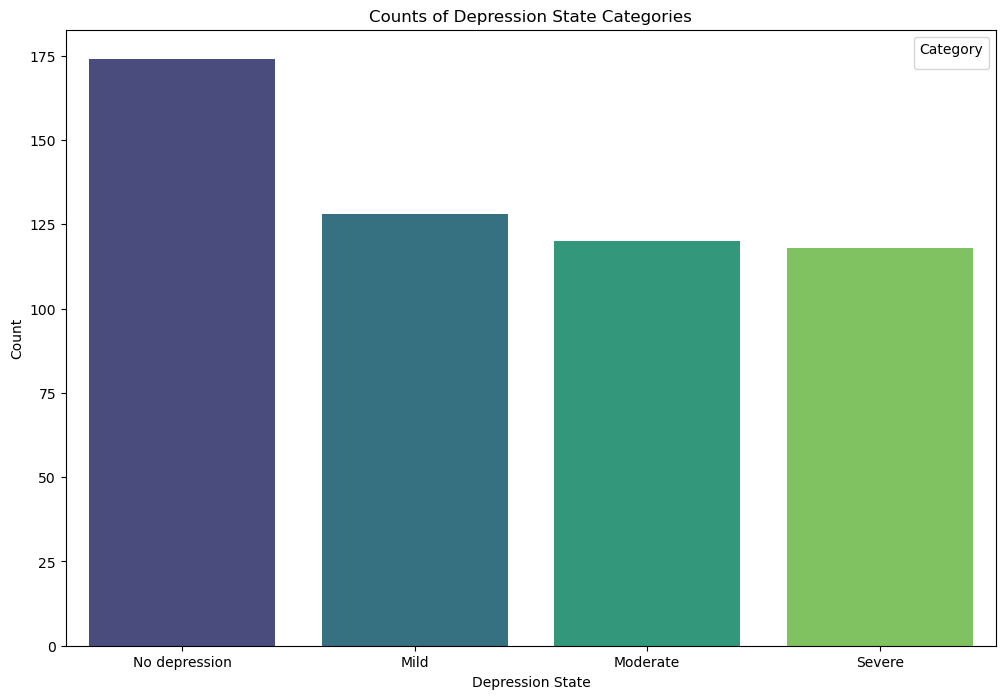

In [17]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Depression State', y='Count', hue='Depression State', data=DepState, palette='viridis')
plt.title('Counts of Depression State Categories')
plt.xlabel('Depression State')
plt.ylabel('Count')
plt.legend(title='Category')
plt.show()

In [19]:
sleepDep = df2.groupby('Depression State').Sleep.value_counts().reset_index(name='Count')

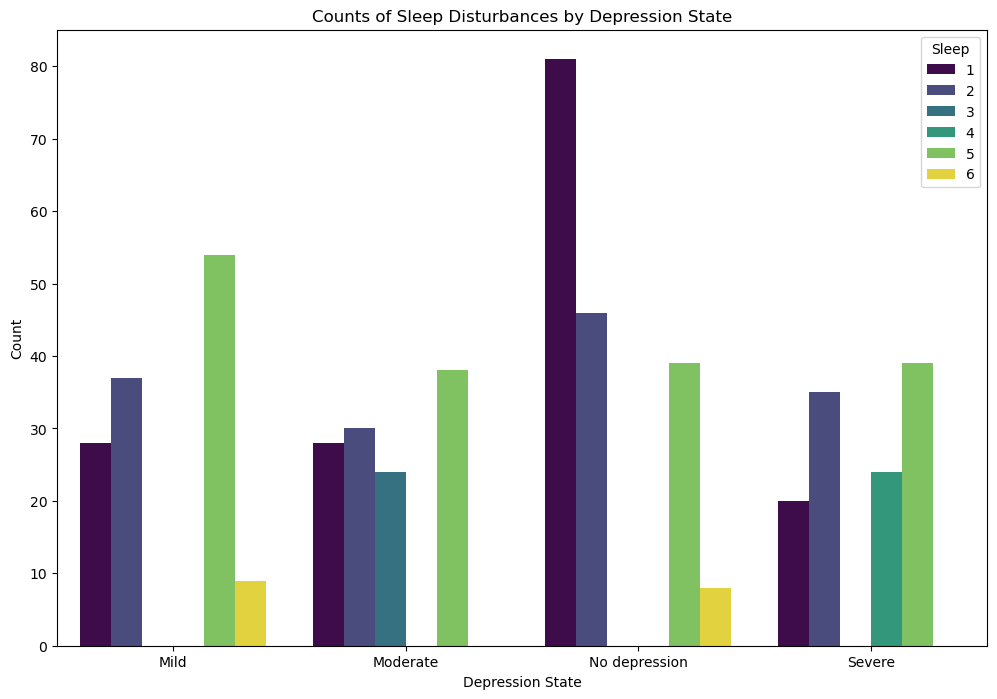

In [21]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Depression State', y='Count', hue='Sleep', data=sleepDep, palette='viridis')
plt.title('Counts of Sleep Disturbances by Depression State')
plt.xlabel('Depression State')
plt.ylabel('Count')
plt.legend(title='Sleep')
plt.show()

In [23]:
df3 = df2.copy()

# Encoding categories in depression state column
depression_mapping = {
    'No depression': 0,
    'Mild': 1,
    'Moderate': 2,
    'Severe': 3
}
df3['Depression State'] = df['Depression State'].map(depression_mapping)

C:\Users\Hp\AppData\Local\Temp\ipykernel_4504\1228561889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Sleep'])
C:\Users\Hp\AppData\Local\Temp\ipykernel_4504\1228561889.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Appetite'])
C:\Users\Hp\AppData\Local\Temp\ipykernel_4504\1

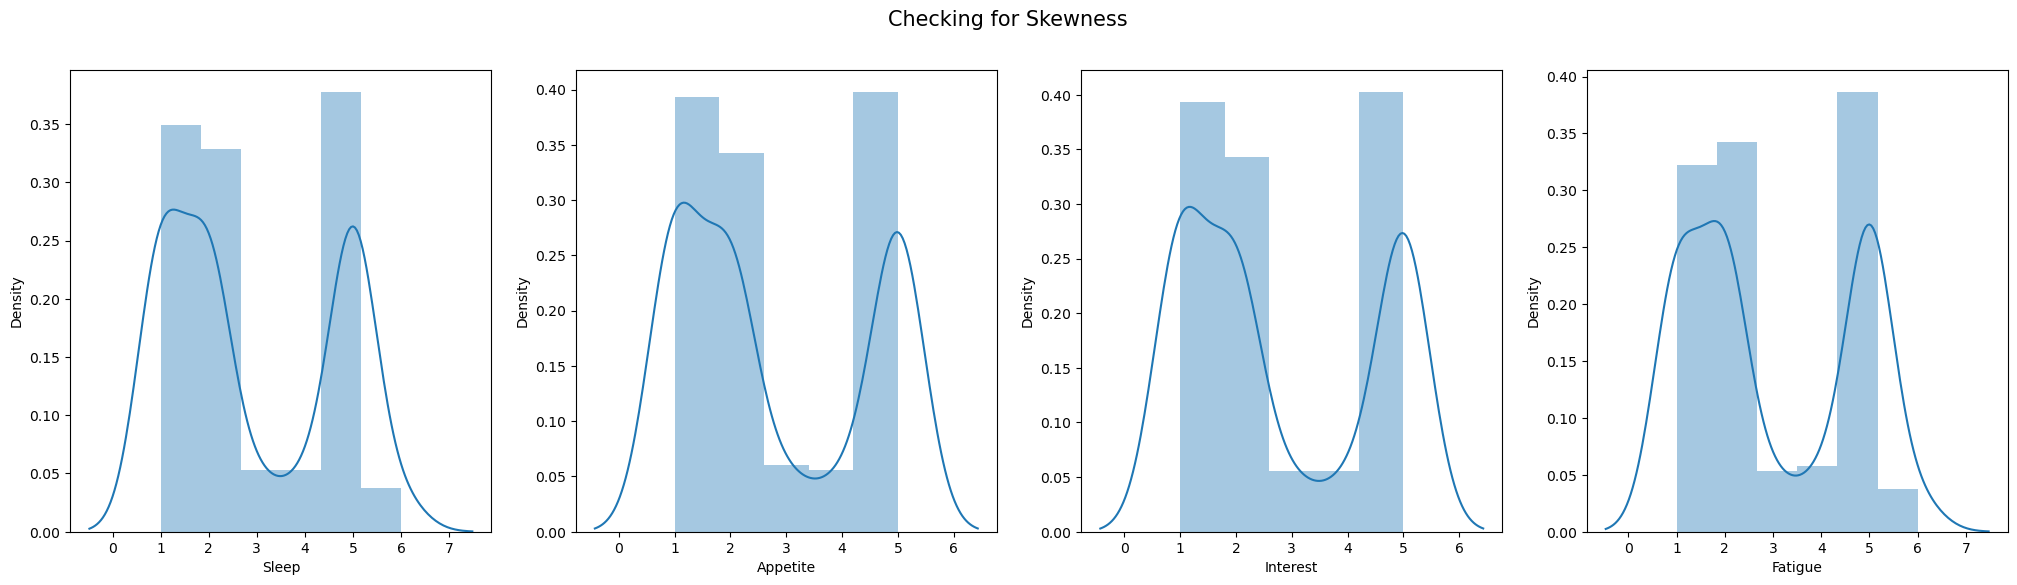

In [25]:
#Checking for skewness

plt.figure(figsize=(25,6))
plt.subplot(1, 4, 1)
sns.distplot(df2['Sleep'])

plt.subplot(1, 4, 2)
sns.distplot(df2['Appetite'])

plt.subplot(1, 4, 3)
sns.distplot(df2['Interest'])

plt.subplot(1, 4, 4)
sns.distplot(df2['Fatigue'])

plt.suptitle('Checking for Skewness', fontsize = 15)
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_4504\927501586.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['Worthlessness'])
C:\Users\Hp\AppData\Local\Temp\ipykernel_4504\927501586.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['Agitation'])
C:\Users\Hp\AppData\Local\Temp\ipykernel

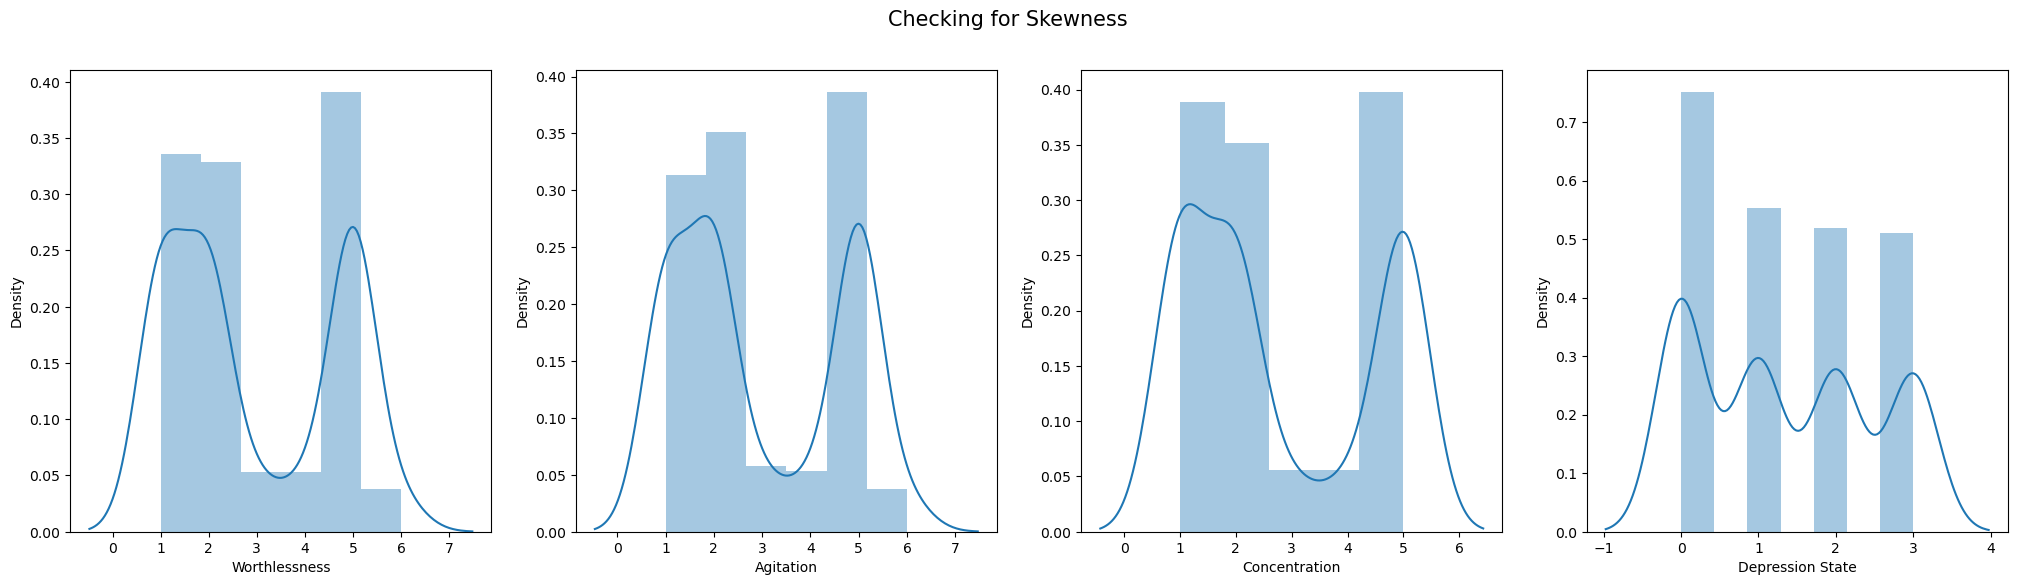

In [26]:
plt.figure(figsize=(25,6))
plt.subplot(1, 4, 1)
sns.distplot(df3['Worthlessness'])

plt.subplot(1, 4, 2)
sns.distplot(df3['Agitation'])

plt.subplot(1, 4, 3)
sns.distplot(df3['Concentration'])

plt.subplot(1, 4, 4)
sns.distplot(df3['Depression State'])

plt.suptitle('Checking for Skewness', fontsize = 15)
plt.show()

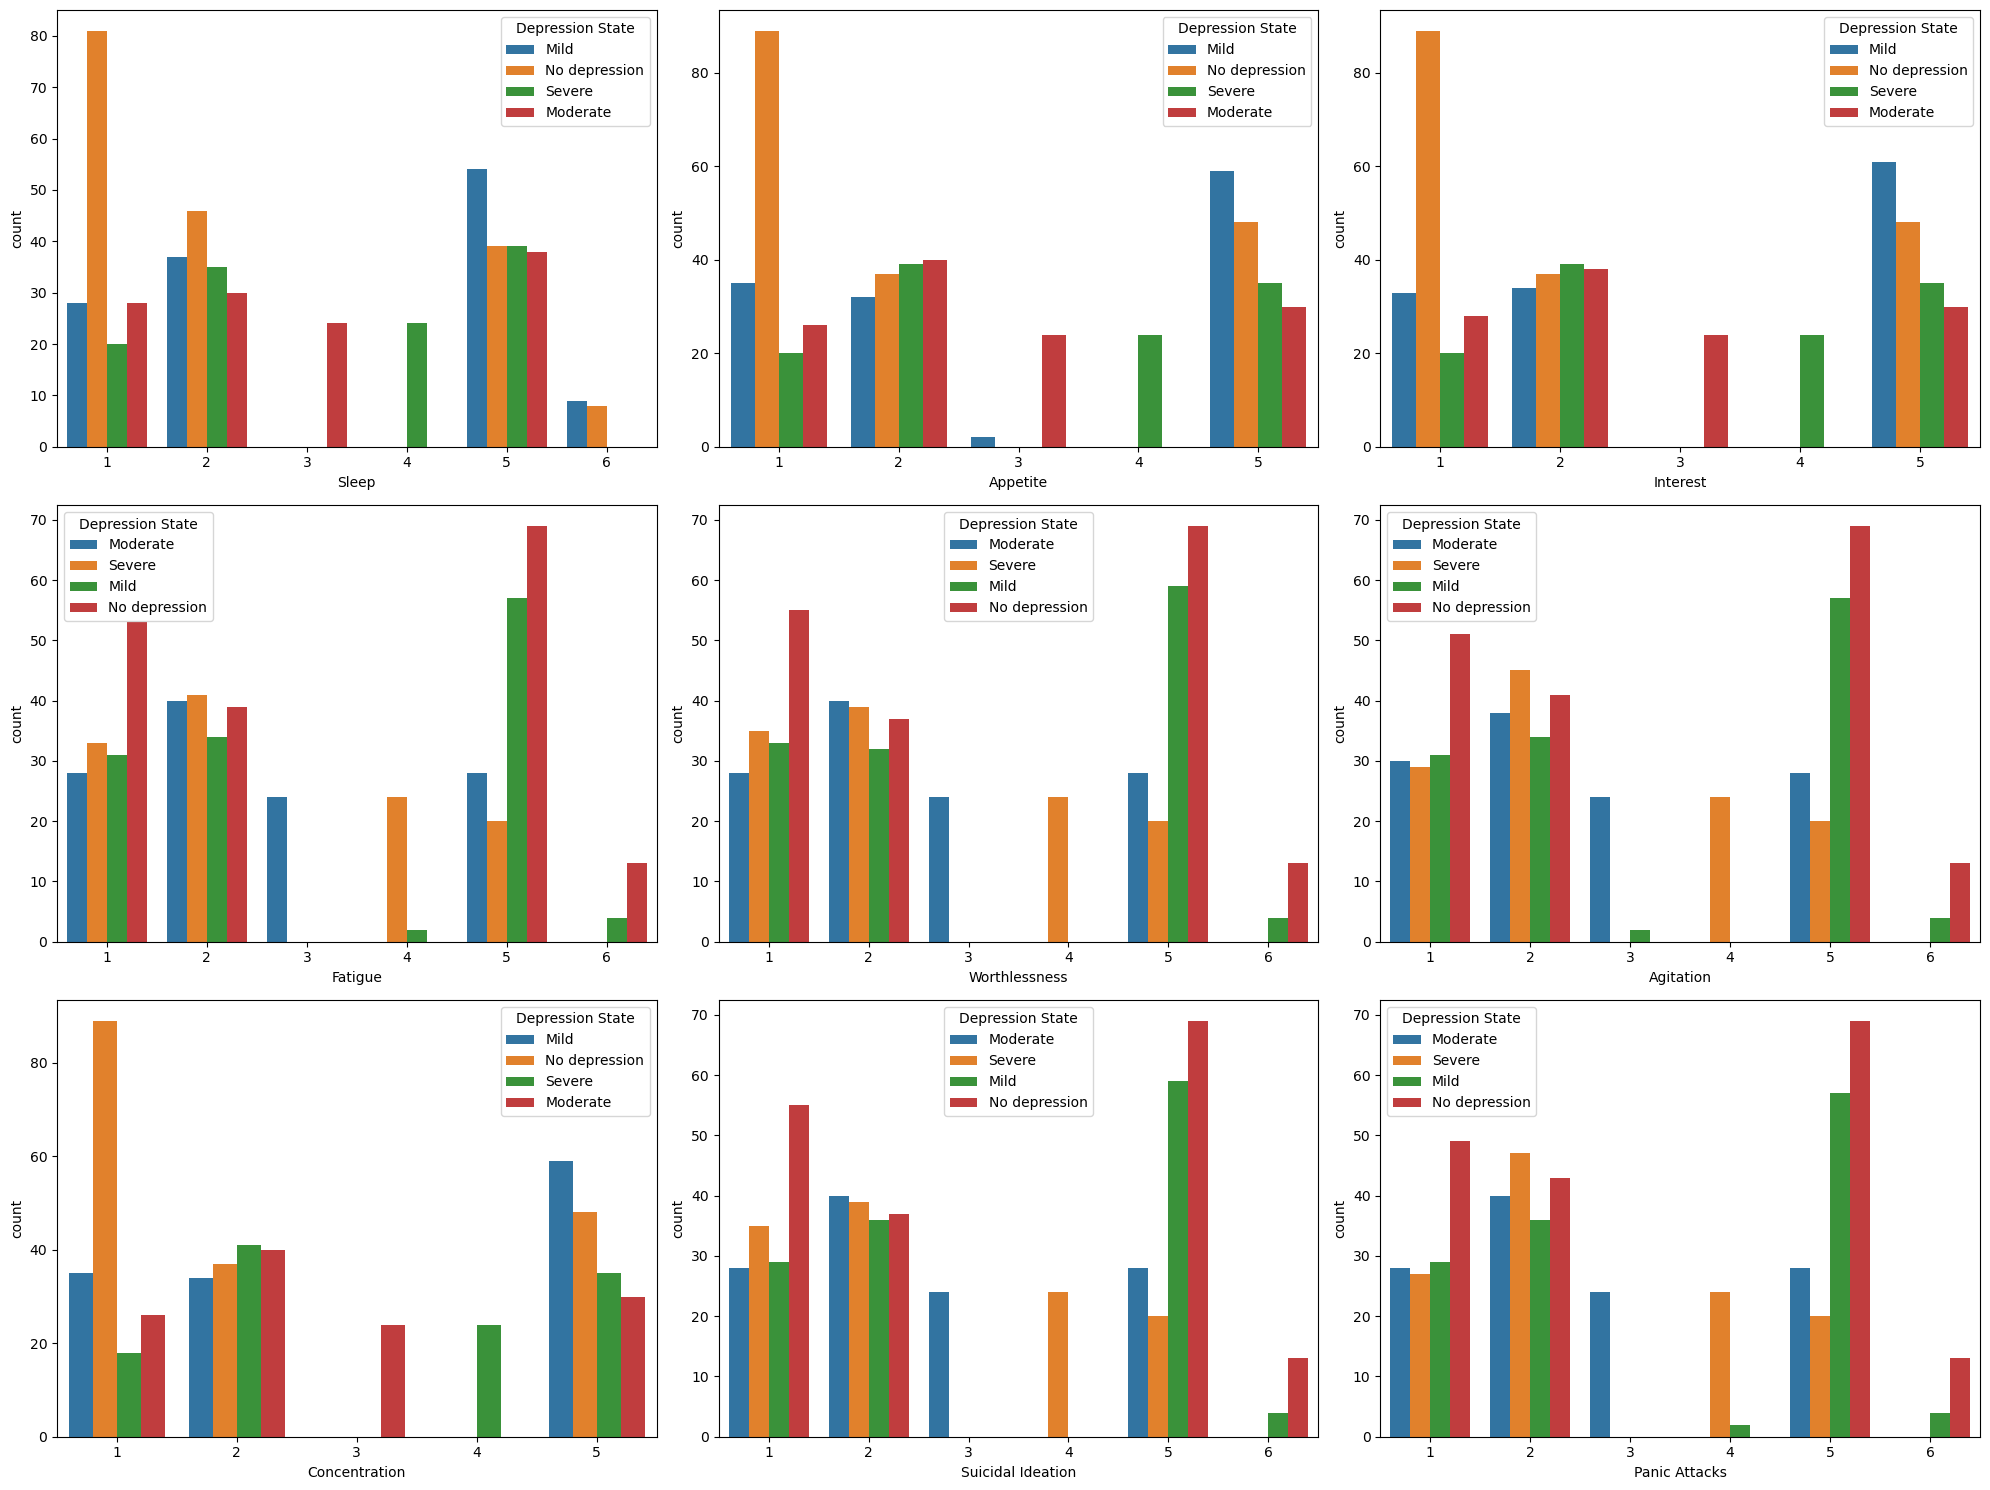

In [29]:
# Relationship between features

plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.countplot(x='Sleep', hue='Depression State', data=df2)
plt.subplot(3,3,2)
sns.countplot(x='Appetite', hue='Depression State', data=df2)
plt.subplot(3,3,3)
sns.countplot(x='Interest', hue='Depression State', data=df2)

plt.subplot(3,3,4)
sns.countplot(x='Fatigue', hue='Depression State', data=df2)
plt.subplot(3,3,5)
sns.countplot(x='Worthlessness', hue='Depression State', data=df2)
plt.subplot(3,3,6)
sns.countplot(x='Agitation', hue='Depression State', data=df2)

plt.subplot(3,3,7)
sns.countplot(x='Concentration', hue='Depression State', data=df2)
plt.subplot(3,3,8)
sns.countplot(x='Suicidal Ideation', hue='Depression State', data=df2)
plt.subplot(3,3,9)
sns.countplot(x='Panic Attacks', hue='Depression State', data=df2)

plt.tight_layout()
plt.show()

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

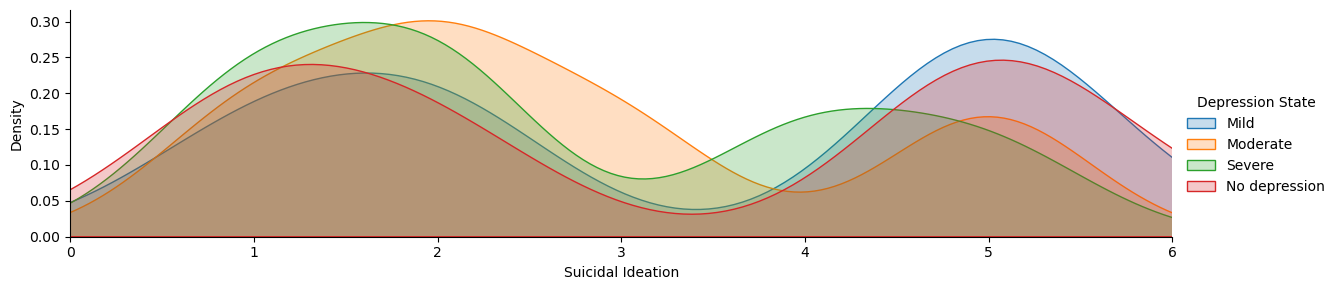

In [30]:
facet = sns.FacetGrid(df,hue="Depression State", aspect=4)
facet.map(sns.kdeplot, 'Suicidal Ideation', shade=True)
facet.set(xlim=(0,df2['Suicidal Ideation'].max()))
facet.add_legend()

plt.show()

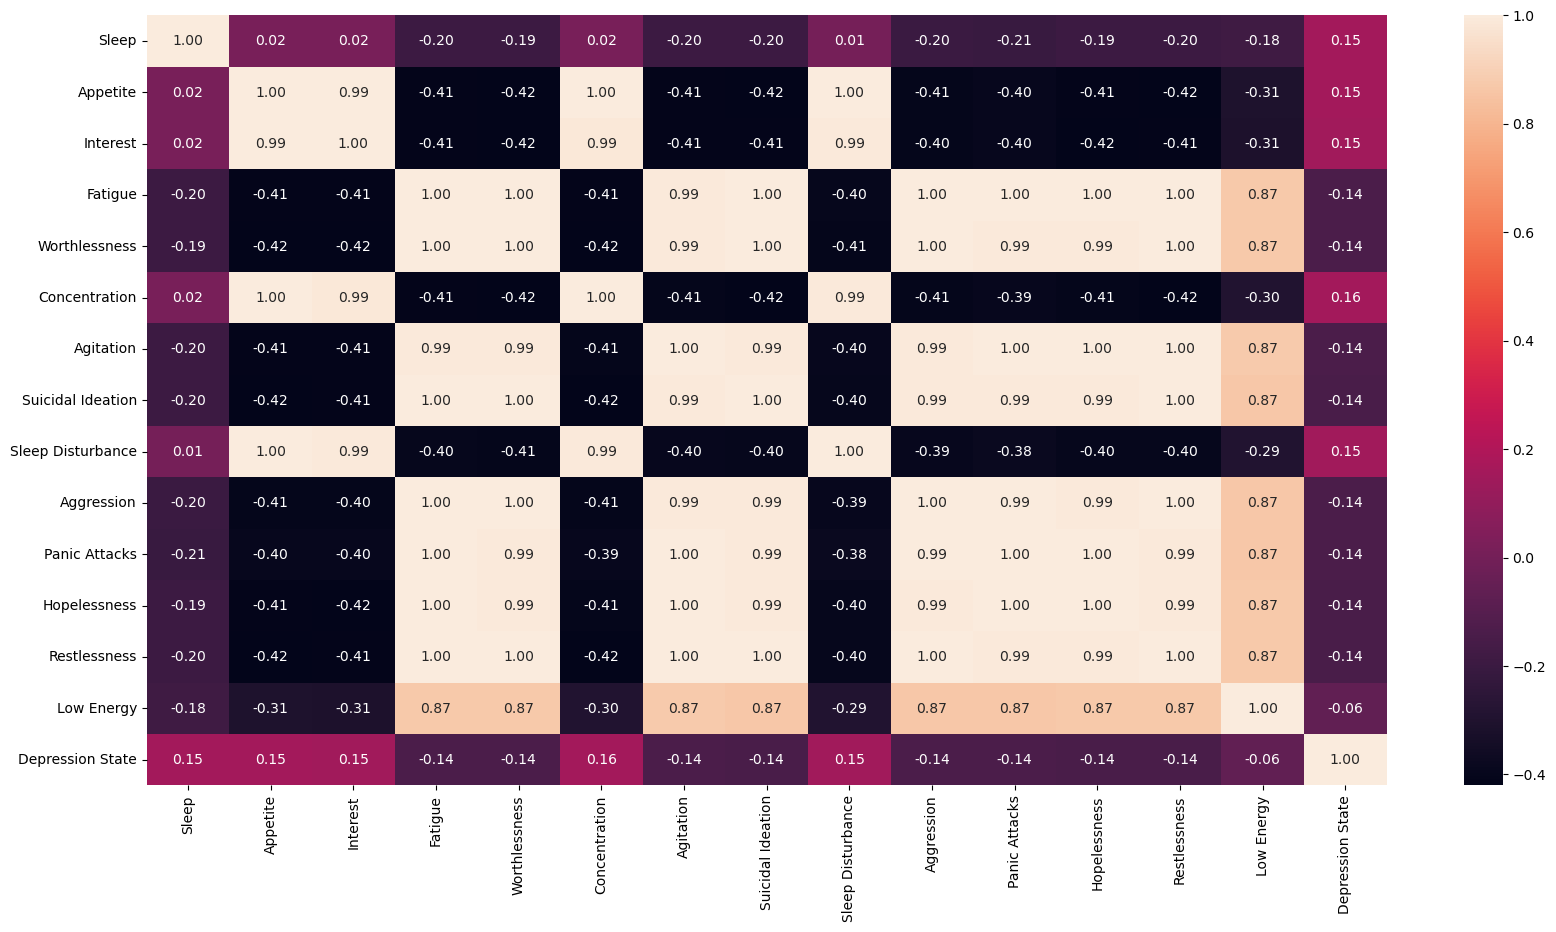

In [31]:
# Correclation Matrix between features

plt.subplots(figsize=(20,10))
sns.heatmap(df3.corr(), annot = True, fmt = ".2f")
plt.show()

In [32]:
# Drop unneccessary columns

dfDrop = df2.drop(['Fatigue', 'Interest', 'Suicidal Ideation', 'Restlessness', 'Agitation', 'Low Energy'], axis=1)

In [68]:
dfDrop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sleep              540 non-null    int64 
 1   Appetite           540 non-null    int64 
 2   Worthlessness      540 non-null    int64 
 3   Concentration      540 non-null    int64 
 4   Sleep Disturbance  540 non-null    int64 
 5   Aggression         540 non-null    int64 
 6   Panic Attacks      540 non-null    int64 
 7   Hopelessness       540 non-null    int64 
 8   Depression State   540 non-null    object
dtypes: int64(8), object(1)
memory usage: 38.1+ KB


In [35]:
# Splitting data

X = dfDrop.iloc[:, :-1].values
y = dfDrop.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

In [47]:
# Resampling data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define the base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
]

from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Updated Logistic Regression with class weights
meta_model = LogisticRegression(multi_class='auto', solver='lbfgs', class_weight=class_weights_dict, random_state=42)

# Train the stacking classifier with class weights
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacking_clf.fit(X_train, y_train)

# Evaluate again
y_pred = stacking_clf.predict(X_test)
print(f"Stacking Classifier Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


C:\Users\Hp\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:26:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Hp\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:26:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Hp\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:26:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Stacking Classifier Accuracy: 0.5462962962962963
Classification Report:
               precision    recall  f1-score   support

         Mild       0.73      0.38      0.50        29
     Moderate       0.44      0.50      0.47        24
No depression       0.67      0.65      0.66        40
       Severe       0.37      0.67      0.48        15

     accuracy                           0.55       108
    macro avg       0.55      0.55      0.53       108
 weighted avg       0.59      0.55      0.55       108



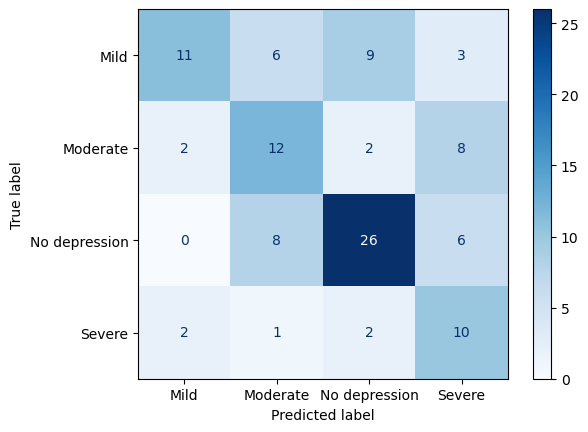

In [49]:
# Confusion Matrix

ConfusionMatrixDisplay.from_estimator(stacking_clf, X_test, y_test, cmap=plt.cm.Blues)
plt.show()